# Importing Required  libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Analyzing Dataset


In [2]:
df = pd.read_csv('C:/Users/INTEL 89/Desktop/MAJOR_CODES_2023/Electric Vehicles Charging/Dataset/Dataset-1_EV-charging-reports.csv')


In [3]:
df.columns

Index(['session_ID', 'Garage_ID', 'User_ID', 'User_type', 'Shared_ID',
       'Start_plugin', 'Start_plugin_hour', 'End_plugout', 'End_plugout_hour',
       'El_kWh', 'Duration_hours', 'month_plugin', 'weekdays_plugin',
       'Plugin_category', 'Duration_category'],
      dtype='object')

# DatasetPreprocessing

In [4]:
# Preprocessing - replace commas with periods in 'Duration_hours' and convert to float
df['Duration_hours'] = df['Duration_hours'].str.replace(',', '.').astype(float)

# Replace NaN values with zeros in the entire DataFrame
df.fillna(0, inplace=True)

# Convert 'Duration_category' to strings for classification
df['Duration_category'] = df['Duration_category'].astype(str)

# Selecting Features values & target values

In [5]:
# Define features and target
features = ['Start_plugin_hour', 'End_plugout_hour', 'Duration_hours']  # Add more features as needed
target = 'Duration_category'

In [6]:
X = df[features]
y = df[target]

# Split the data into training and testing sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN classifier model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [9]:
# Initialize and train the KNN classifier
k = 5  # Example: You can change the number of neighbors (k) as needed
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
predictions = model.predict(X_test)

# Calculate accuracy

In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9803779069767442


# Classification report

In [13]:
# Classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Classification Report:
                         precision    recall  f1-score   support

                      0       1.00      1.00      1.00         7
Between 12 and 15 hours       0.97      0.97      0.97       199
Between 15 and 18 hours       0.96      0.95      0.96       139
  Between 3 and 6 hours       0.97      0.98      0.97       162
 Between 6 and 9  hours       0.97      0.95      0.96       100
 Between 9 and 12 hours       0.99      0.98      0.99       207
      Less than 3 hours       0.99      1.00      1.00       356
     More than 18 hours       0.98      0.99      0.99       206

               accuracy                           0.98      1376
              macro avg       0.98      0.98      0.98      1376
           weighted avg       0.98      0.98      0.98      1376



# Confusion matrix

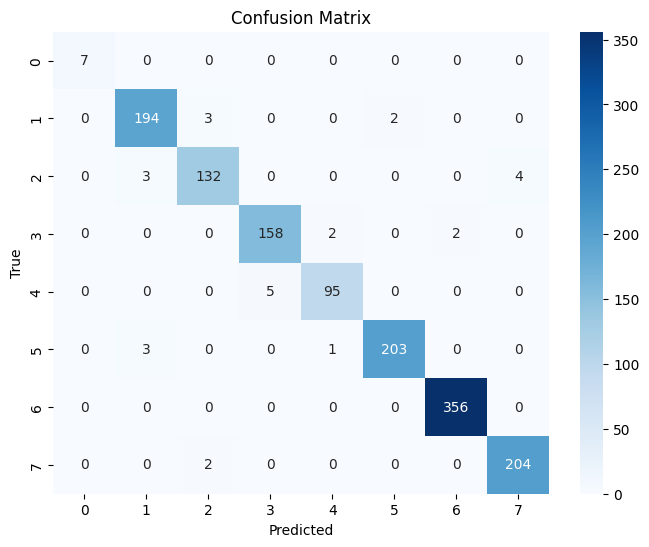

In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Pie chart

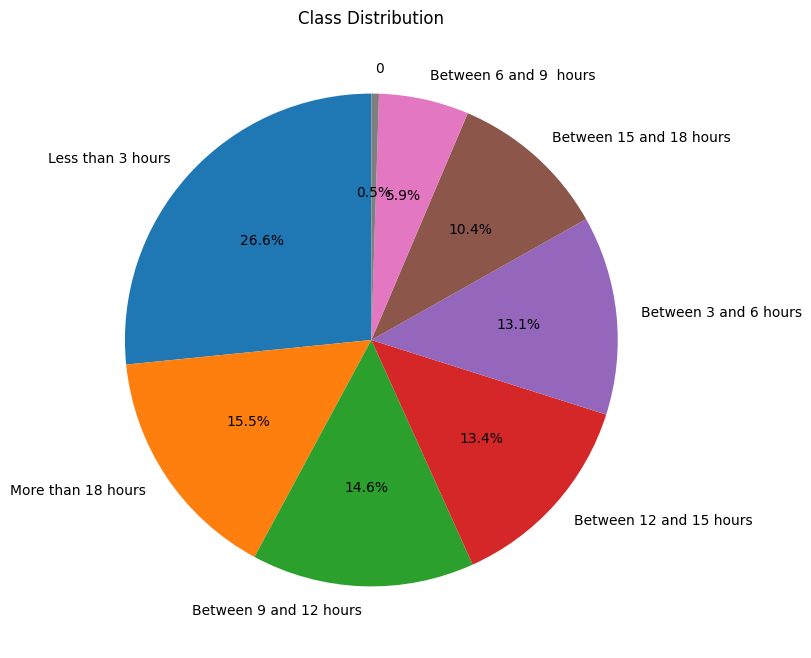

In [15]:
# Pie chart for class distribution
class_distribution = df['Duration_category'].value_counts()
plt.figure(figsize=(8, 8))
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

# Save Model

In [17]:
import pickle
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Navi Bayes Model

Accuracy: 0.9382267441860465
Classification Report:
                         precision    recall  f1-score   support

                      0       1.00      1.00      1.00         7
Between 12 and 15 hours       1.00      0.94      0.97       199
Between 15 and 18 hours       0.89      0.98      0.93       139
  Between 3 and 6 hours       0.92      0.91      0.92       162
 Between 6 and 9  hours       0.86      0.75      0.80       100
 Between 9 and 12 hours       0.89      0.96      0.92       207
      Less than 3 hours       0.97      0.98      0.98       356
     More than 18 hours       0.96      0.93      0.94       206

               accuracy                           0.94      1376
              macro avg       0.94      0.93      0.93      1376
           weighted avg       0.94      0.94      0.94      1376



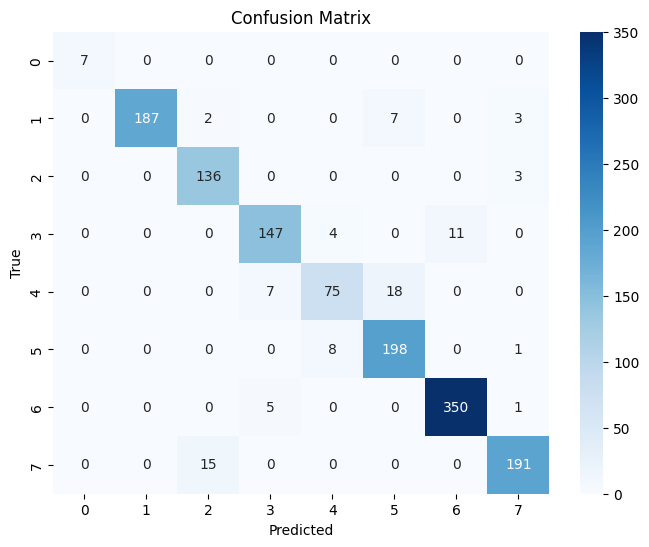

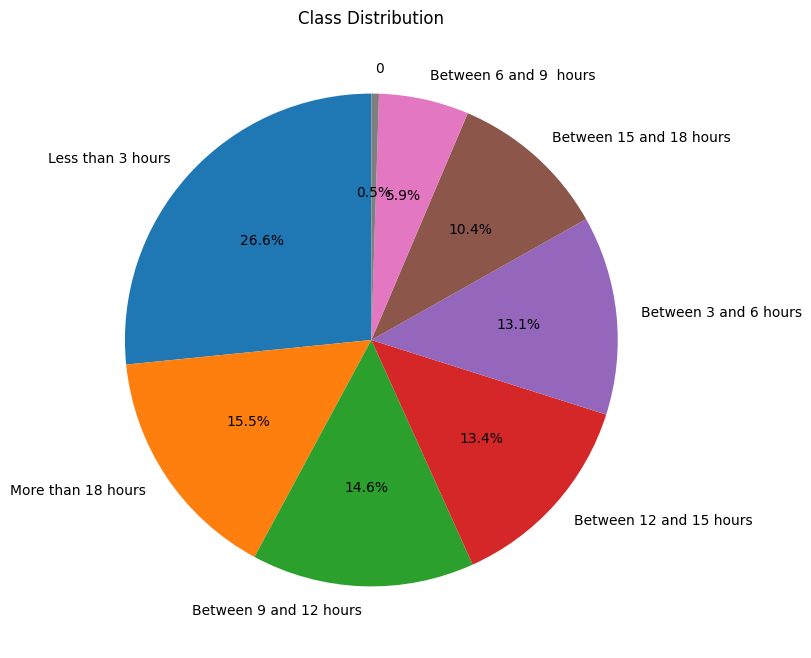

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

predictions = nb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Pie chart for class distribution (as you already have it)
# Displaying the pie chart for class distribution
class_distribution = df['Duration_category'].value_counts()
plt.figure(figsize=(8, 8))
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()


# LinearRegression Model

Accuracy: 0.019622093023255814
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00       199
           2       0.00      0.00      0.00       139
           3       0.02      0.01      0.01       162
           4       0.02      0.11      0.03       100
           5       0.02      0.04      0.02       207
           6       0.00      0.00      0.00       356
           7       1.00      0.02      0.05       206
           8       0.00      0.00      0.00         0

    accuracy                           0.02      1376
   macro avg       0.12      0.02      0.01      1376
weighted avg       0.16      0.02      0.01      1376



C:\Users\INTEL 89\anaconda3\envs\java\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\INTEL 89\anaconda3\envs\java\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\INTEL 89\anaconda3\envs\java\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\INTEL 89\anacon

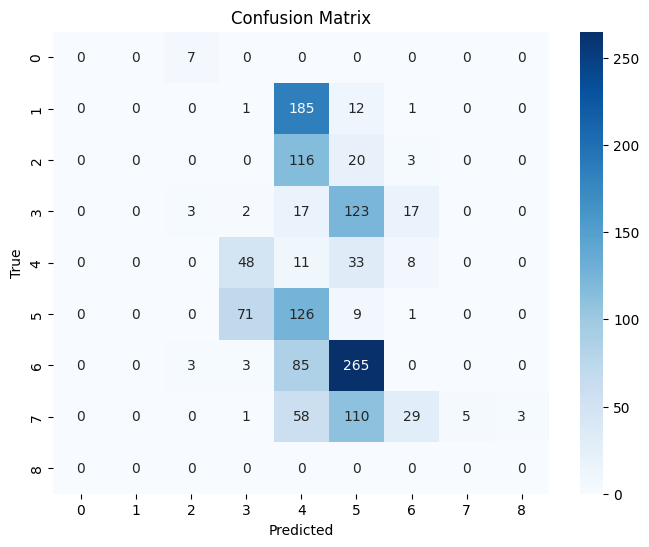

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('C:/Users/INTEL 89/Desktop/MAJOR_CODES_2023/Electric Vehicles Charging/Dataset/Dataset-1_EV-charging-reports.csv')

# Preprocessing - replace commas with periods in 'Duration_hours' and convert to float
df['Duration_hours'] = df['Duration_hours'].str.replace(',', '.').astype(float)

# Replace NaN values with zeros in the entire DataFrame
df.fillna(0, inplace=True)

# Convert 'Duration_category' to strings for classification
df['Duration_category'] = df['Duration_category'].astype(str)

# Ordinal encoding of 'Duration_category'
le = LabelEncoder()
df['Duration_category_encoded'] = le.fit_transform(df['Duration_category'])

# Define features and target
features = ['Start_plugin_hour', 'End_plugout_hour', 'Duration_hours']
target = 'Duration_category_encoded'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Round predictions to the nearest integer to get predicted encodings
predictions = predictions.round().astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:

#output Testing

# import pandas as pd
# import pickle

# # Load the saved model
# with open('naive_bayes_model.pkl', 'rb') as file:
#     knn_model = pickle.load(file)

# # New input data for prediction
# new_input_data = pd.DataFrame({
#     'Start_plugin_hour': [7],
#     'End_plugout_hour': [9],
#     'Duration_hours': [1]
#     # Add values for each feature based on your input
# })

# # Make predictions using the loaded model
# predictions = knn_model.predict(new_input_data)
# print(predictions)